IMPORTING THE LIBRARIES

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split #for splitting data

#importing classifiers for our model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [28]:
#readig the dataset
df = pd.read_csv(r'voice.csv')
df.head() #displays the first five of the dataframe by default

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [29]:
df.shape #gives dimensions of the array

(3168, 21)

In [30]:
df.isnull().sum() #returns the number of missing values in the data set, in this dataset there are no missing values 

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [31]:
df.dtypes # displays the datatype of each coloumn

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [32]:
d1 = df['label'].value_counts()#returns object containing counts of unique values 
d1

female    1584
male      1584
Name: label, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder #here we using the labelEncoder because the datatpe of label is a object so we convert into int  

In [34]:
lb = LabelEncoder()

In [35]:
df['label'] = lb.fit_transform(df['label']) #Fit label encoder and return encoded labels
df['label'].value_counts() #returns object containing counts of unique values 

0    1584
1    1584
Name: label, dtype: int64

In [36]:
df.dtypes#here we get the datatype of label feature as int

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label         int32
dtype: object

In [37]:
df.columns #columns in dataset

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [38]:
#separating the columns of dataset
x = df.iloc[:,:-1] #all columns except the last one
y = df['label'] #last column
print(x.shape,y.shape)
print(type(x),type(y))

(3168, 20) (3168,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [39]:
x.head() #taking all input values as x

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [40]:
y.head() #taking the value to be predicted as y

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

In [41]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.20) #splitting the dataset into training and testing set such that 80% of data is used to train the model and 20% of data is used to test the model
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


In [42]:
import seaborn as sns #library for plotting statistical graphs

In [50]:
def apply_model(model): #here we define a function to fit the model
    model.fit(x_tr,y_tr)
    ypred = model.predict(x_te)
    print('Predicted values\n',ypred)
    print('Accuracy',model.score(x_te,y_te)) #accuracy score
    cm = confusion_matrix(y_te,ypred) #constructing a confusion matrix
    print('Confusion Matrix\n',cm)#printing the confusion matrix
    sns.heatmap(cm,annot=True)
    plt.show()
    print('Classification report\n',classification_report(y_te,ypred)) #creating a classification report

DECISION TREE CLASSIFICATIO

Predicted values
 [0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1
 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0
 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1
 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0
 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1
 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1
 1 0 0 

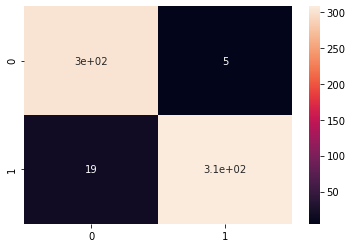

Classification report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       307
           1       0.98      0.94      0.96       327

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [51]:
# a) Decision Tree Classification
m1 = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
apply_model(m1)#calling the function 


RANDOM FOREST CLASSIFICATION

Predicted values
 [0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1
 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0
 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0
 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1
 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1
 1 0 0 

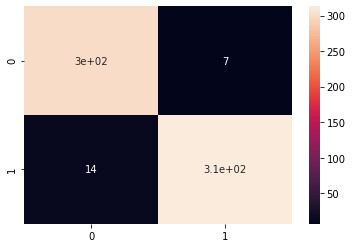

Classification report
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       307
           1       0.98      0.96      0.97       327

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [52]:
# b) Random Forest Classification
m2 = RandomForestClassifier(n_estimators=310,criterion='gini',max_depth=5,min_samples_split=10)
apply_model(m2)#calling the function

KNN CLASSIFICATION

Predicted values
 [0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0
 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1
 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1
 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0
 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0
 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1
 1 0 0 

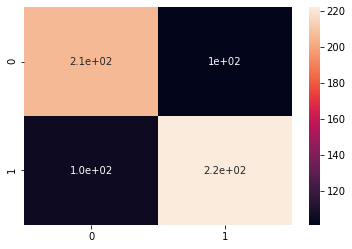

Classification report
               precision    recall  f1-score   support

           0       0.66      0.67      0.67       307
           1       0.69      0.68      0.68       327

    accuracy                           0.68       634
   macro avg       0.67      0.67      0.67       634
weighted avg       0.68      0.68      0.68       634



In [53]:
# c) KNN Classification
m3 = KNeighborsClassifier(n_neighbors=100)
apply_model(m3)#calling the function

LOGISTIC REGRESSION

Predicted values
 [0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1
 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0
 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0
 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1
 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1
 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0
 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1
 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0
 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1
 1 0 0 

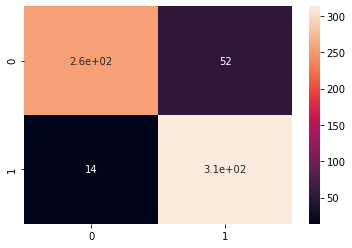

Classification report
               precision    recall  f1-score   support

           0       0.95      0.83      0.89       307
           1       0.86      0.96      0.90       327

    accuracy                           0.90       634
   macro avg       0.90      0.89      0.90       634
weighted avg       0.90      0.90      0.90       634



In [54]:
# d) Logistic Regression
m4 = LogisticRegression(solver='liblinear')
apply_model(m4)#calling the function

SVM CLASSIFICATION

Predicted values
 [0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1
 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0
 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0
 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1
 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0
 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1
 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0
 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1
 1 0 0 

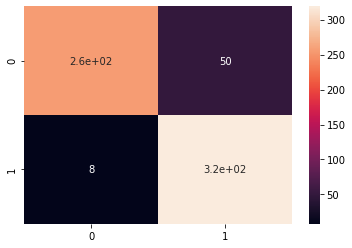

Classification report
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       307
           1       0.86      0.98      0.92       327

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.92      0.91      0.91       634



In [55]:
# e) SVM Classification 
m5 = SVC(kernel='linear',C=1)
apply_model(m5)#calling the function

In [49]:
#printing accuracy of each model we have trained
print('Decision Tree Classifier Accuracy -',m1.score(x_te,y_te))
print('Random Forest Classifier Accuracy -',m2.score(x_te,y_te))
print('KNN Classifier Accuracy -',m3.score(x_te,y_te))
print('Logistic Regression Accuracy -',m4.score(x_te,y_te))
print('SVM Classifier Accuracy -',m5.score(x_te,y_te))

Decision Tree Classifier Accuracy - 0.9605678233438486
Random Forest Classifier Accuracy - 0.9668769716088328
KNN Classifier Accuracy - 0.6750788643533123
Logistic Regression Accuracy - 0.8958990536277602
SVM Classifier Accuracy - 0.9085173501577287


#### Hence, both Decision tree and Random Forest Classifiers are the best models having with high accuracy.